In [299]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

In [300]:
from geobipy import StatArray
from geobipy import RectilinearMesh2D
from geobipy import RectilinearMesh3D
from geobipy import Model
import h5py
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np

In [314]:
# Specify some cell centres in x and y
x = StatArray(np.arange(-3.0, 3.0, 0.1), 'Easting', 'm')
y = StatArray(np.arange(-3.0, 3.0, 0.2), 'Northing', 'm')
z = StatArray(np.arange(-3.0, 3.0, 0.4), 'Depth', 'm')

xx, yy = np.meshgrid(x[:-1], y[:-1])
height = np.sin(xx**2 + yy**2) / (xx**2 + yy**2)

In [324]:
rm = RectilinearMesh3D(xEdges=x, yEdges=y, zEdges=z, height=height)

values = height[None, :, :] * np.ones(rm.z.nCells.value)[:, None, None]
mod = Model(rm, values = values)

In [303]:
pv = mod.pyvista_mesh()
pv.plot()

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

In [304]:
pv.save('Model3D.vtk')
!open Model3D.vtk

In [328]:
rm.pyvista_mesh().save('Model3D.vtk')
mod[:25, :20, :15].pyvista_mesh().save('Model3Da.vtk')
rm[:, :, 25].pyvista_mesh().save('Model3Db.vtk')
rm[:, 0, :].pyvista_mesh().save('Model3Dc.vtk')
rm[0, :, :].pyvista_mesh().save('Model3Dd.vtk')

In [329]:
# !open Model3D.vtk
!open Model3Da.vtk
# !open Model3Db.vtk
# !open Model3Dc.vtk
# !open Model3Dd.vtk

In [310]:
rm.shape

(14, 29, 59)

In [311]:
height.shape

(29, 59)

<class 'geobipy.src.classes.core.StatArray.StatArray'>


In [226]:
mod.pyvista_mesh().save('Model3D.vtk')

In [227]:
!open Model3D.vtk

In [322]:
height.shape

(29, 59)

In [333]:
rm = RectilinearMesh2D(xEdges=x, yEdges=y, heightCentres=height[25, :])

<IPython.core.display.Javascript object>


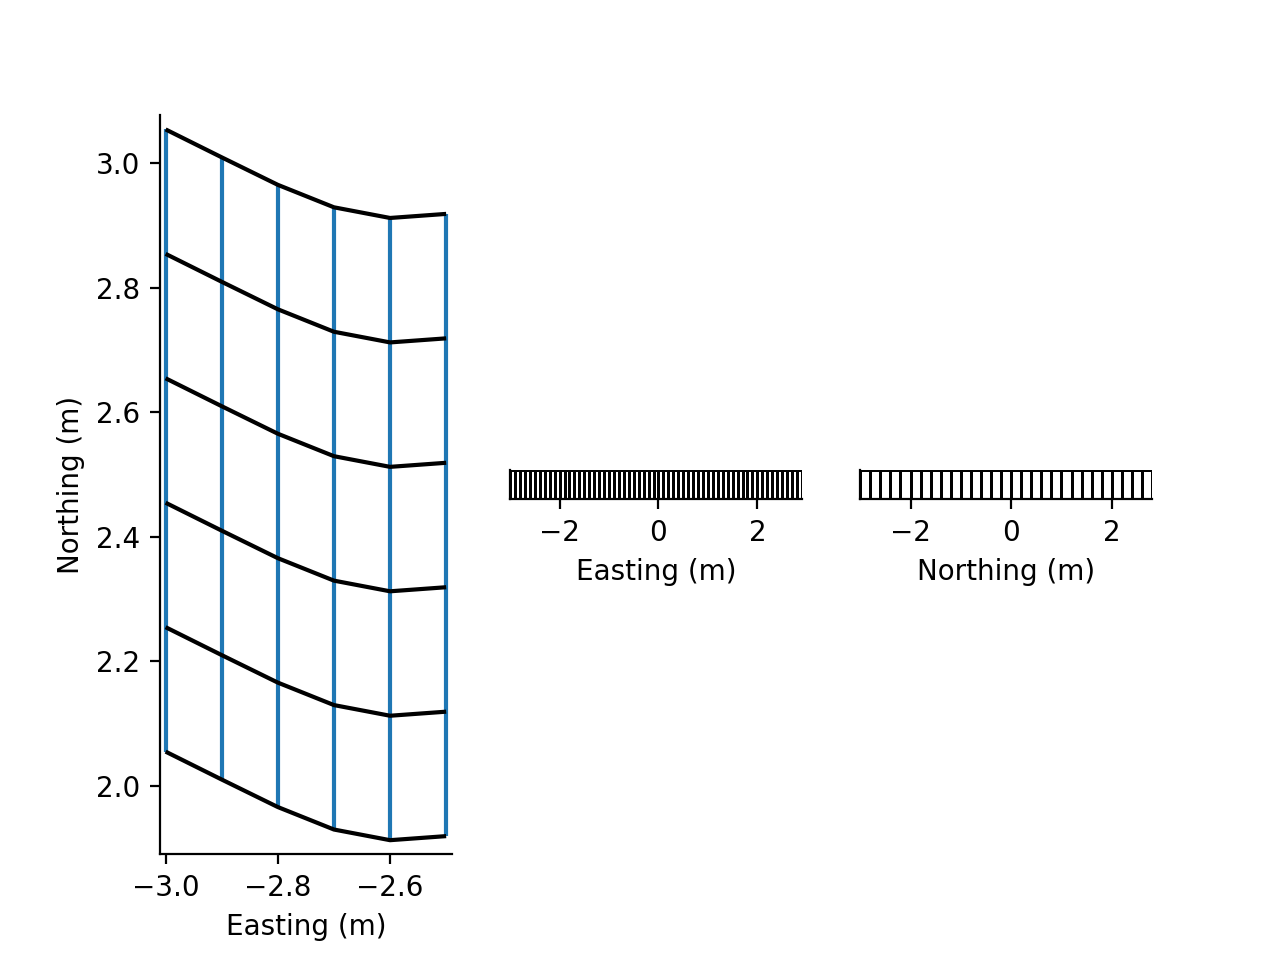

In [335]:
plt.figure()
plt.subplot(131)
rm[:5, :5].plotGrid()
plt.subplot(132)
rm[0, :].plotGrid()
plt.subplot(133)
rm[:, 0].plotGrid()

In [338]:
x = StatArray(np.random.randn(10, 10, 10))

In [340]:
x.toHdf('test.h5', 'test')

In [345]:
import h5py
with h5py.File('test.h5', 'r') as f:
    x = StatArray().fromHdf(f['test'], index=np.s_[0, 5:, 5:])

In [346]:
x.shape

(5, 5)

In [347]:
x

StatArray([[ 0.87386322,  0.03156635,  0.79683227, -1.95618756,
             1.27790128],
           [-1.03683366, -1.24530452, -0.96686884, -1.00869959,
             0.08067344],
           [-1.12470828,  1.38635048,  0.70432456, -0.43010225,
            -0.12528831],
           [ 0.18388659,  0.27681185,  0.20994451,  1.67302806,
            -0.96445099],
           [ 0.90383359, -0.94787789,  1.23587997, -1.20835587,
             1.36320845]])